In [46]:
import keras
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator

In [47]:
import matplotlib.pyplot as plt


In [48]:
import os
def plot_imgs(directory, top=10):
    all_item_dirs = os.listdir(directory)
    item_files = [os.path.join(directory, file) for file in all_item_dirs][:5]
  
    plt.figure(figsize=(20, 20))
  
    for i, img_path in enumerate(item_files):
        plt.subplot(10, 10, i+1)
    
        img = plt.imread(img_path)
        plt.tight_layout()         
        plt.imshow(img, cmap='gray') 

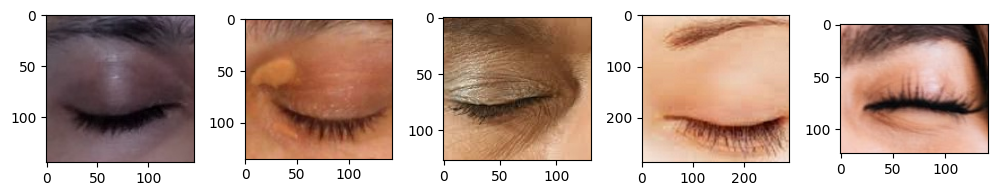

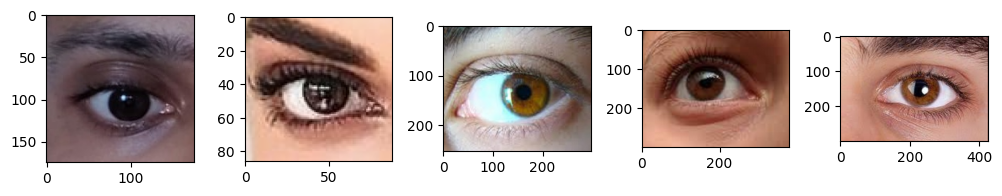

In [49]:
data_path = 'C:/Users/VISHNU/Desktop/dataset_new/train'


directories = ['/Closed', '/Open']

for j in directories:
    plot_imgs(data_path+j)

In [50]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1)

train_dir = 'C:/Users/VISHNU/Desktop/dataset_new/train'
batch_size = 32
num_classes = 4
img_size = (224, 224)


train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset='training')

val_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation')

base_model = MobileNet(input_shape=img_size + (3,), weights='imagenet', include_top=False)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit_generator(
        train_generator,
        steps_per_epoch=train_generator.samples // batch_size,
        epochs=10,
        validation_data=val_generator,
        validation_steps=val_generator.samples // batch_size)

model.save('yawn_detection_mobilenet.h5')

Found 2223 images belonging to 4 classes.
Found 244 images belonging to 4 classes.
Epoch 1/10
69/69 [==============================] - 19s 162ms/step - loss: 0.3896 - accuracy: 0.8412 - val_loss: 0.3297 - val_accuracy: 0.8036
Epoch 2/10
69/69 [==============================] - 8s 111ms/step - loss: 0.1511 - accuracy: 0.9370 - val_loss: 0.4274 - val_accuracy: 0.8125
Epoch 3/10
69/69 [==============================] - 8s 121ms/step - loss: 0.0868 - accuracy: 0.9703 - val_loss: 0.2414 - val_accuracy: 0.8750
Epoch 4/10
69/69 [==============================] - 8s 111ms/step - loss: 0.0714 - accuracy: 0.9731 - val_loss: 0.3489 - val_accuracy: 0.8348
Epoch 5/10
69/69 [==============================] - 8s 114ms/step - loss: 0.0779 - accuracy: 0.9681 - val_loss: 0.2729 - val_accuracy: 0.8661
Epoch 6/10
69/69 [==============================] - 9s 123ms/step - loss: 0.0391 - accuracy: 0.9849 - val_loss: 0.2291 - val_accuracy: 0.9018
Epoch 7/10
69/69 [==============================] - 8s 114ms/ste

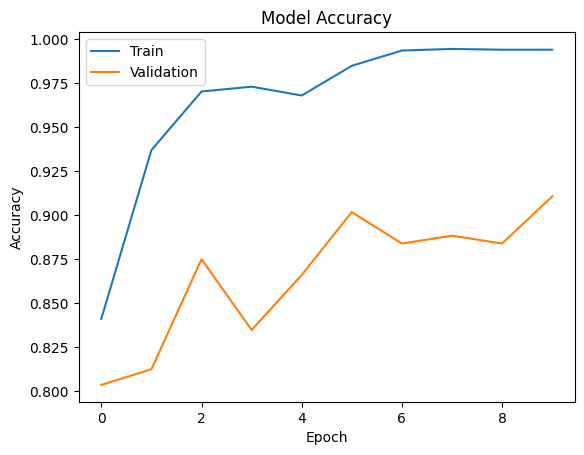

In [51]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()




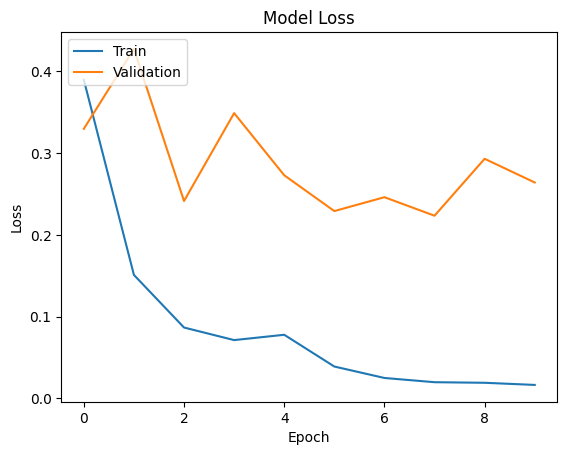

In [52]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [53]:


model.summary()


Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0   